In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')


In [3]:
df.sample(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
97768,66374.0,1.152264,0.676978,-0.339084,1.178103,0.393154,-0.430885,0.178680,0.000722,-0.459950,...,0.019439,0.161542,-0.115251,-0.096350,0.612216,-0.317316,0.052477,0.045383,1.00,0
86390,61212.0,-0.637609,0.813732,0.566288,-0.629230,1.262439,-0.832802,1.346881,-0.135563,-0.567078,...,0.175889,0.399986,-0.135961,-0.294021,-0.051126,-0.675870,0.116874,0.160863,24.99,0
169597,119769.0,-0.614792,0.992446,-0.233792,-2.276419,0.373609,-1.488008,0.962361,0.116004,0.153883,...,-0.138074,-0.297075,0.049829,-0.061430,-0.665627,0.335474,0.211959,0.187992,4.00,0
187857,127718.0,-0.494523,1.062633,-0.600250,-1.001267,1.023944,0.211172,0.701037,0.472664,-0.574922,...,-0.101436,-0.257434,0.058647,-0.178935,-0.680082,0.158987,0.261170,0.195193,24.74,0
269479,163666.0,-1.249888,0.897585,0.749081,-3.305014,0.030446,-1.375776,0.822718,0.238565,0.716878,...,0.006211,0.091490,-0.476114,-0.047796,1.077797,-0.270016,0.110860,0.029099,10.57,0
276722,167265.0,0.227762,0.289597,1.015659,-0.637503,0.370580,0.171195,0.357602,0.029423,0.302130,...,-0.076652,-0.055174,0.264691,0.677034,-1.333811,-0.266005,-0.034956,-0.095983,10.00,0
124400,77274.0,1.246205,-0.408767,0.893519,-0.716890,-1.284550,-0.845182,-0.628962,0.013947,1.947250,...,-0.021872,0.146293,-0.025635,0.386760,0.472003,-0.683817,0.088214,0.033514,1.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print('This data has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

This data has 284807 rows and 31 columns


In [6]:
#set the display preferences for the data in pandas df to be set to 3 decimals
pd.set_option('precision',3)
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


Check distributions of these two variables

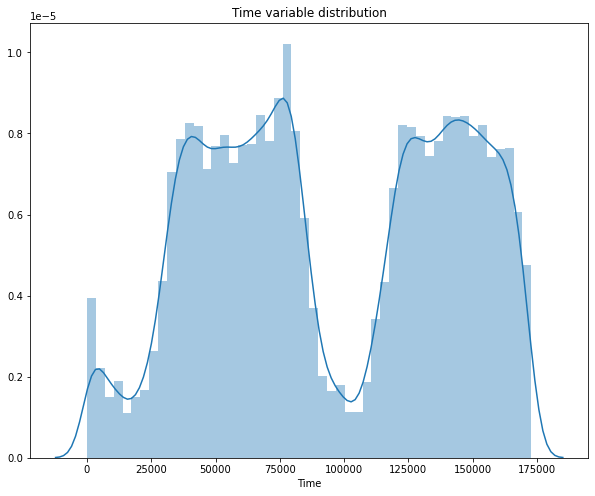

In [7]:
plt.figure(figsize=(10,8))
plt.title('Time variable distribution')
sns.distplot(df.Time)

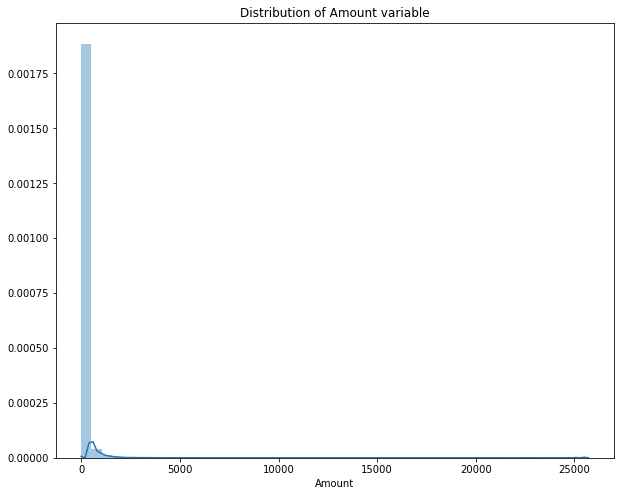

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount variable')
sns.distplot(df.Amount)

Amount variable has huge outliers while the distribution of Time is bimodal

we will now start looking at the fraud vs normal transactions

In [9]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraud = (fraudulent/(normal+fraudulent))*100
print('There were {} normal values with a ({:.3f}%) nomal rate along with a {} fraudulent score with a ({:.3f}%) percentage'.format(normal,perc_normal, fraudulent,perc_fraud ))

There were 284315 normal values with a (99.827%) nomal rate along with a 492 fraudulent score with a (0.173%) percentage


Text(0, 0.5, 'Count')

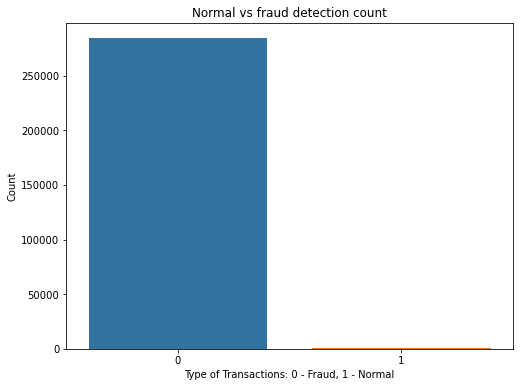

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y = counts)
plt.title('Normal vs fraud detection count')
plt.xlabel('Type of Transactions: 0 - Fraud, 1 - Normal')
plt.ylabel('Count')

Now we will explore the data correlations in the df

Text(0.5, 1.0, 'Correlation Matrix')

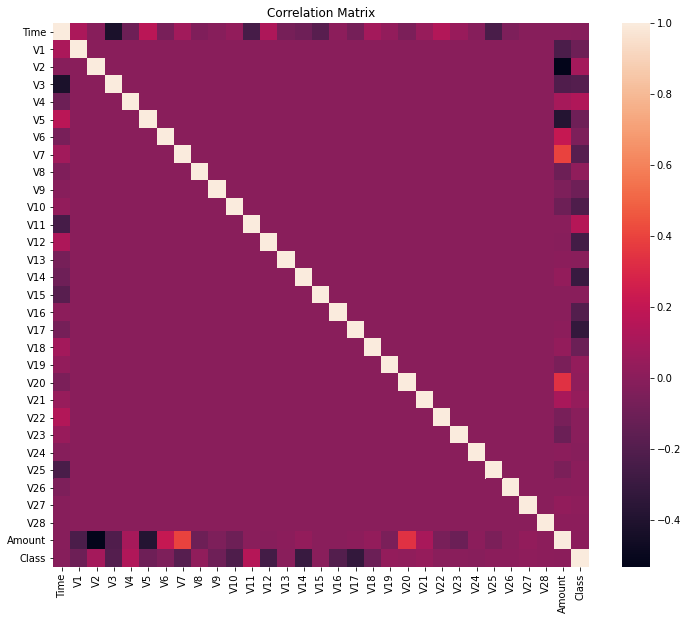

In [11]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=cor)
plt.title('Correlation Matrix')

In [12]:
df.skew()

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [13]:
#v28, amount and time have a stronger skew so we will now scale them

In [14]:
from sklearn.preprocessing import StandardScaler
#scaler for time variable
scaler1 = StandardScaler()
scaled_time = scaler1.fit_transform(df[['Time']])

scaled_time
#make the array into a list and then convert it into a series
scaled_time = [value for sublist in scaled_time.tolist() for value in sublist]
scaled_time = pd.Series(scaled_time).rename('scaled_time')
print(type(scaled_time))



<class 'pandas.core.series.Series'>


In [15]:
#scaling the amount columns
scaler2= StandardScaler()
scaled_amount = scaler2.fit_transform(df[['Amount']])
scaled_amount = pd.Series([value for sublist in scaled_amount.tolist() for value in sublist])



In [16]:
#scaling the v28 column
scaler3 = StandardScaler()
scaled_v28 = scaler3.fit_transform(df[['V28']])
scaled_v28 = pd.Series([value for sublist in scaled_v28.tolist() for value in sublist])

In [17]:
df = pd.concat([scaled_v28.rename('scaled_v28'),scaled_time.rename('scaled_time'),scaled_amount.rename('scaled_amount'),df],axis=1)

In [18]:
#dropping old variables
df.drop(['Time','Amount','V28'],axis=1,inplace=True)
df.head()

,scaled_v28,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,Class
0,-0.064,-1.997,0.245,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,...,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,0
1,0.045,-1.997,-0.342,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,...,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0
2,-0.181,-1.997,1.161,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,...,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,0
3,0.186,-1.997,0.141,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,...,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0
4,0.652,-1.997,-0.073,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,...,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0


Now we will first deal with the unbalanced classes in order to apply clustering algorithms 

In [19]:
#Use upsampling technique to fix the class imbalance

from sklearn.utils import resample
df_majority = df[df.Class==0].copy()
print(df_majority.shape[0])
df_minority = df[df.Class==1].copy()
df_minority_unsampled = resample(df_minority,replace=True,n_samples=df_majority.shape[0],random_state=42)
df_upsampled = pd.concat([df_minority_unsampled,df_majority,],axis=0)
print(df_upsampled.shape[0])
df_upsampled.info()
df_upsampled.sample(7)

284315
568630
<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 33276 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_v28     568630 non-null  float64
 1   scaled_time    568630 non-null  float64
 2   scaled_amount  568630 non-null  float64
 3   V1             568630 non-null  float64
 4   V2             568630 non-null  float64
 5   V3             568630 non-null  float64
 6   V4             568630 non-null  float64
 7   V5             568630 non-null  float64
 8   V6             568630 non-null  float64
 9   V7             568630 non-null  float64
 10  V8             568630 non-null  float64
 11  V9             568630 non-null  float64
 12  V10            568630 non-null  float64
 13  V11            568630 non-null  float64
 14  V12            568630 non-null  float64
 15  V13            568630 non-null  float64
 16  V14            568630 non-null  float64
 17  V15        

,scaled_v28,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,Class
105178,0.344,-0.535,-0.349,1.140,1.134,-1.429,2.012,0.623,-1.153,0.221,...,-0.444,-0.100,-0.367,-0.892,-0.161,-0.108,0.668,-0.352,0.072,1
106212,0.152,-0.525,-0.014,1.117,-0.502,0.823,0.577,-0.955,-0.041,-0.561,...,-1.777,-0.329,-0.157,-0.024,-0.037,0.078,0.327,-0.282,0.079,0
214804,0.005,0.948,-0.349,2.102,0.620,-2.670,0.595,0.957,-1.366,0.408,...,-0.420,-0.085,0.056,0.404,-0.149,-0.911,0.382,-0.058,0.024,0
49211,0.033,-1.071,0.050,1.018,0.085,-0.354,1.066,0.341,-0.150,0.484,...,-0.282,0.022,0.117,0.155,-0.251,-0.289,0.743,-0.258,-0.017,0
44270,-3.245,-1.115,-0.349,-20.907,9.843,-19.948,6.156,-15.142,-2.240,-21.234,...,1.127,0.397,-1.977,0.653,-0.520,0.542,-0.054,0.113,-3.765,1
16780,1.169,-1.404,0.047,-27.144,15.366,-28.407,6.371,-20.088,-4.666,-18.709,...,0.784,1.704,1.797,-1.961,-0.902,0.144,2.024,-0.204,1.332,1
30270,0.038,-1.242,-0.350,1.237,0.145,0.147,0.520,-0.341,-0.611,-0.167,...,0.229,-0.196,-0.282,-0.950,0.102,-0.095,0.159,0.104,-0.041,0


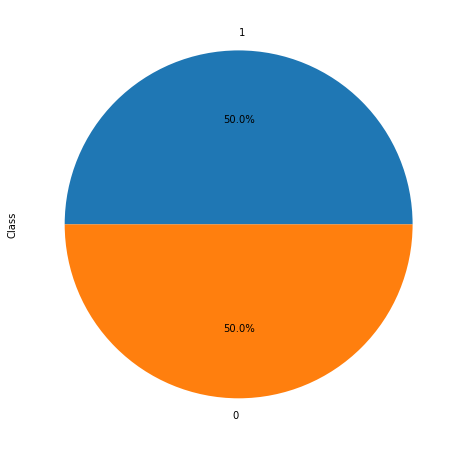

1    284315
0    284315
Name: Class, dtype: int64


In [20]:
#visualize the upsampled new dataset

import matplotlib.pyplot as plt
df_upsampled['Class'].value_counts().plot(kind='pie',figsize=(10,8),autopct='%1.1f%%')
plt.show()
print(df_upsampled['Class'].value_counts())


In [21]:
#Now we will look at the correlations again in the upsampled df
#Using higher coorelation variables first for feature extraction
cor = df_upsampled.corr()
cor = cor[['Class']]
print(cor)
print(cor[np.abs(cor.Class)>=0.4])
cor[np.abs(cor.Class)>=0.4].index.tolist()



               Class
scaled_v28     0.086
scaled_time   -0.147
scaled_amount  0.066
V1            -0.432
V2             0.489
V3            -0.566
V4             0.710
V5            -0.374
V6            -0.396
V7            -0.476
V8             0.058
V9            -0.558
V10           -0.627
V11            0.686
V12           -0.683
V13           -0.052
V14           -0.750
V15           -0.047
V16           -0.596
V17           -0.559
V18           -0.467
V19            0.267
V20            0.167
V21            0.127
V22            0.005
V23           -0.015
V24           -0.094
V25            0.032
V26            0.055
V27            0.086
Class          1.000
       Class
V1    -0.432
V2     0.489
V3    -0.566
V4     0.710
V7    -0.476
V9    -0.558
V10   -0.627
V11    0.686
V12   -0.683
V14   -0.750
V16   -0.596
V17   -0.559
V18   -0.467
Class  1.000


['V1',
 'V2',
 'V3',
 'V4',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'Class']

In [22]:
# we will now check the results from a lasso regression with Cross Validation
from sklearn.linear_model import LassoCV

#split data
print(df_upsampled.shape)
print((df_upsampled.iloc[:,30].name))

X = df_upsampled.iloc[:,0:30]
y= df_upsampled.iloc[:,30]
feature_names = df_upsampled.columns

#model fit and print coeficients 
lasso_model = LassoCV(cv=5).fit(X,y)
variable_coefs = pd.Series(np.abs(lasso_model.coef_))
variable_coefs.index = X.columns
print(variable_coefs)




(568630, 31)
Class
scaled_v28       0.000
scaled_time      0.000
scaled_amount    0.000
V1               0.003
V2               0.000
V3               0.000
V4               0.034
V5               0.000
V6               0.000
V7               0.000
V8               0.003
V9               0.000
V10              0.000
V11              0.000
V12              0.000
V13              0.000
V14              0.057
V15              0.000
V16              0.000
V17              0.000
V18              0.000
V19              0.000
V20              0.000
V21              0.000
V22              0.000
V23              0.000
V24              0.000
V25              0.000
V26              0.000
V27              0.000
dtype: float64


In [23]:
#get non zero coefficeints
variable_list1 = variable_coefs[variable_coefs>0.0].index.tolist()
print(variable_list1)

#highly correlated with target variable features list
variable_list2 =cor[np.abs(cor.Class)>=0.4].index[:-1].tolist()
print(variable_list2)

#joining the two lists

var_list = list(set(variable_list1 + variable_list2))
print(var_list)

['V1', 'V4', 'V8', 'V14']
['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']
['V1', 'V11', 'V4', 'V12', 'V14', 'V7', 'V10', 'V8', 'V9', 'V2', 'V17', 'V3', 'V18', 'V16']


In [24]:
feature_data = df_upsampled[(var_list+['Class'])]
feature_data.head()

,V1,V11,V4,V12,V14,V7,V10,V8,V9,V2,V17,V3,V18,V16,Class
33276,-7.924,3.266,4.421,-2.719,-5.275,-5.283,-0.795,0.132,0.658,-5.198,-4.698,-3.000,-1.712,-2.996,1
239499,-2.151,1.904,0.119,-2.644,-4.691,-2.809,-4.485,-2.679,-0.557,2.188,-3.483,-3.431,-0.065,-2.553,1
154720,-5.552,7.051,8.416,-10.138,-9.909,-6.900,-6.864,3.750,-3.880,5.678,-8.523,-9.776,-2.013,-5.023,1
142557,-1.431,1.275,0.390,0.024,0.727,1.326,-0.713,0.196,-0.547,-0.803,-0.566,1.123,0.216,0.348,1
41395,-4.447,5.730,6.945,-5.032,-10.787,-2.591,-3.977,0.343,-3.881,-0.015,0.636,-5.126,0.994,-1.104,1


In [25]:
# PCA feature selection 
from sklearn.decomposition import PCA
X= feature_data.drop(['Class'],axis=1).reset_index(drop=True)
y= feature_data[['Class']].reset_index(drop=True)
scaler = StandardScaler()
X=scaler.fit_transform(X)
pca = PCA()
pca.fit(X)

print(X.shape[0])
print(y.shape[0])

print(pca.explained_variance_ratio_)

#from the explained_variance_ratio we can see that around five features expain most of the variance

pca1= PCA(n_components = 5)
pca_features = pca1.fit_transform(X)

pca_features_final = pd.DataFrame(data = pca_features, columns = ['pca_feature_{}'.format(x) for x in range(1,6)])

pca_df = pd.concat([pca_features_final, y],axis=1)

pca_df.sample(10)
pca_df.columns


568630
568630
[0.71543922 0.09227969 0.06402979 0.04529995 0.02295344 0.01441982
 0.01166443 0.00805974 0.00727068 0.00458811 0.00425296 0.00389968
 0.00338107 0.00246142]


Index(['pca_feature_1', 'pca_feature_2', 'pca_feature_3', 'pca_feature_4',
       'pca_feature_5', 'Class'],
      dtype='object')

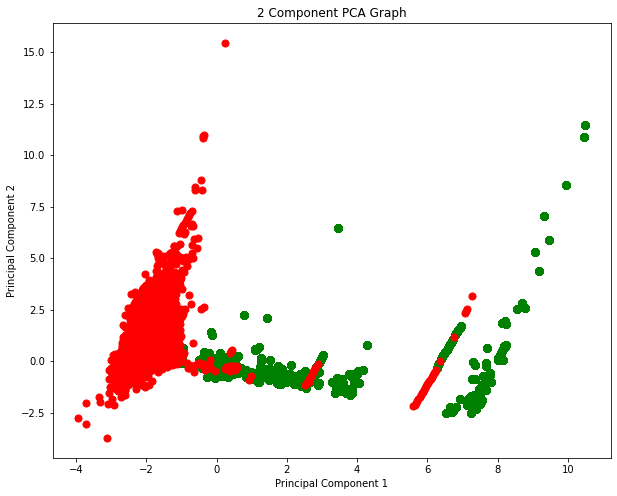

In [26]:
#Visualize the pca features preliminary results. Since we know that the first two features explain most of the variance, we can simply look at the

plt.figure(figsize=(10,8))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA Graph')

targets = [1,0]
colors = ['g','r']

for target,color in zip(targets,colors):
    indicesToKeep = pca_df['Class'] == target
    plt.scatter(pca_df.loc[indicesToKeep,'pca_feature_1'],pca_df.loc[indicesToKeep,'pca_feature_2'],
                          c= color,
                          s=50)
plt.show()
                



We can see so far that the PCA components do somewhat a good job of seperating the classes already


Now we will start fitting models to the pca_df where we have very little to no multicolinearity and limited features

 # Algorithms 



In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
                  
X = pca_df.drop(['Class'],axis=1)
Y = pca_df[['Class']]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

accuracies ={}
kappaScores= {}
f1scores={}

****XGBOOST Classifier

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.9426956017093716, 0.9437419763290716, 0.9617062061445931, 0.9773138947997819, 0.991699347554649, 0.998091905105253, 0.9987953502277404, 0.9992350034292949, 0.9993756924537924, 0.9995603467984454]


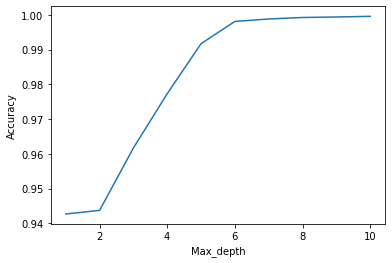

In [28]:
from xgboost import XGBClassifier
accuracy = []
for n in range(1,11):
    
    xgb =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.78,
                           colsample_bytree=1, max_depth=n)
    xgb.fit(X_train,y_train)
    
    prediction = xgb.predict(X_test)
    
    accuracy.append(accuracy_score(y_test, prediction))
    
print(accuracy)    
plt.plot(range(1,11), accuracy)
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()    

In [29]:
# RandomizeSearchCV

from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
    'learning_rate' : [0.08, 0.06, 0.04, 0.09],      
    'max_depth': range(1,11),
    'n_estimators': [100, 200, 300,500,1000]}
xgb =XGBClassifier()
xgb_randomcv_model=RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=2, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(xgb_randomcv_model.best_params_)
print('xgb_randomcv_model accuracy = {}'.format(xgb_randomcv_model.best_score_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.7min finished
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.09}
xgb_randomcv_model accuracy = 0.9997120270611604


In [30]:
from xgboost import XGBClassifier
xgb =XGBClassifier(n_estimators=200, learning_rate=0.08, max_depth=6)
xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)
acc = accuracy_score(y_test, prediction)*100
print("Xgboost Classifier accuracy:",acc)
accuracies['Xgboost Classifier']=acc

f1=f1_score(y_test,prediction)*100
print("F1 Score: ",f1)
f1scores['Xgboost Classifier']=f1

cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Xgboost Classifier']=cohen_kappa

Xgboost Classifier accuracy: 99.93581063257302
F1 Score:  99.93552546744036
Cohen Kappa score:  99.8716188066313


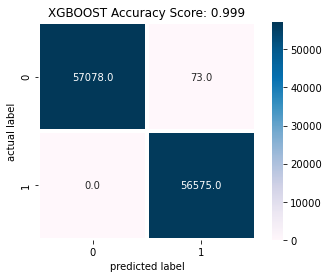

In [32]:
score=round(accuracy_score(y_test,prediction),3)
cm1= confusion_matrix(y_test,prediction)

sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('XGBOOST Accuracy Score: {0}'.format(score),size=12)
plt.show()

In [33]:
# RandomizeSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': range(1,11),
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500,1000]}
rf=RandomForestClassifier()
rf_randomcv_model=RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=2, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(rf_randomcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(rf_randomcv_model.best_score_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

In [34]:
{'n_estimators': 500, 'min_samples_split': 11, 'min_samples_leaf': 9, 'max_features': 2, 'max_depth': 90, 'bootstrap': True}

clf = RandomForestClassifier(n_estimators=200,min_samples_split=11,min_samples_leaf=7, max_features=2,max_depth= 80)
clf.fit(X_train,y_train)

prediction = clf.predict(X_test)
acc = accuracy_score(y_test,prediction)*100
print("Random Forest Accuracy:",acc)
accuracies['Random Forest']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Random Forest']=f1


cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Random Forest']=cohen_kappa

SyntaxError: invalid syntax (<ipython-input-34-6943188b0c61>, line 2)

In [ ]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('Random Forest accuracy_score: {0}'.format(score),size=12)
plt.show()

Will not be using GridsearchCV or RandomSearch for Hyperparameter tuning as it requires too much computing provider

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=100,min_samples_leaf=10)
dtree.fit(X_train, y_train)
prediction=dtree.predict(X_test)

print(cross_val_score(dtree,X,Y,cv=5))
scores = cross_val_score(dtree, X, Y,scoring='accuracy', cv=10)
print(scores.mean())

In [ ]:
acc = accuracy_score(y_test,prediction)*100
print("Decision Tree Accuracy:",acc)
accuracies['Decision Tree']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Decision Tree']=f1


cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Decision Tree']=cohen_kappa

In [ ]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('Decision Tree Accuracy Score: {0}'.format(score),size=12)
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=101,multi_class='ovr',solver='liblinear',class_weight='balanced',C=0.2)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
scores = cross_val_score(lr, X, Y, cv=10)
print(scores.mean())

In [ ]:
acc = accuracy_score(y_test,prediction)*100
print("Logistic Regression Accuracy:",acc)
accuracies['Logistic Regression']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Logistic Regression']=f1


cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Logistic Regression']=cohen_kappa

In [ ]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('Logistic Regression Accuracy Score: {0}'.format(score),size=12)
plt.show()

# Comparison of accuracies

In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Comparison of Kappa Scores

In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Kappa Score %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(kappaScores.keys()), y=list(kappaScores.values()), palette=colors)
plt.show()

# Comparison of F1 Scores

In [ ]:

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("F1 Score %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(f1scores.keys()), y=list(f1scores.values()), palette=colors)
plt.show()